<a href="https://colab.research.google.com/github/moxie77/RNN/blob/main/RNN_GOOGL_Stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime
from pandas_datareader import data, wb
%matplotlib inline
sns.set()

In [2]:
start = datetime.datetime(2016,1,1)
end = datetime.datetime(2021,2,4)

In [3]:
GOOGL = data.DataReader('GOOGL','yahoo', start, end)

In [4]:
GOOGL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,762.200012,747.539978,762.200012,759.440002,3369100,759.440002
2016-01-05,769.200012,755.650024,764.099976,761.530029,2260800,761.530029
2016-01-06,765.729980,748.000000,750.369995,759.330017,2410300,759.330017
2016-01-07,755.309998,735.280029,746.489990,741.000000,3156600,741.000000
2016-01-08,750.119995,728.919983,747.799988,730.909973,2375300,730.909973


In [5]:
GOOGL.drop('Adj Close',inplace=True,axis=1)

In [6]:
GOOGL.head()

,High,Low,Open,Close,Volume
Date,,,,,
2016-01-04,762.200012,747.539978,762.200012,759.440002,3369100
2016-01-05,769.200012,755.650024,764.099976,761.530029,2260800
2016-01-06,765.729980,748.000000,750.369995,759.330017,2410300
2016-01-07,755.309998,735.280029,746.489990,741.000000,3156600
2016-01-08,750.119995,728.919983,747.799988,730.909973,2375300


In [7]:
GOOGL = GOOGL.reset_index()

In [8]:
GOOGL.head()

,Date,High,Low,Open,Close,Volume
0,2016-01-04,762.200012,747.539978,762.200012,759.440002,3369100
1,2016-01-05,769.200012,755.650024,764.099976,761.530029,2260800
2,2016-01-06,765.729980,748.000000,750.369995,759.330017,2410300
3,2016-01-07,755.309998,735.280029,746.489990,741.000000,3156600
4,2016-01-08,750.119995,728.919983,747.799988,730.909973,2375300


In [9]:
GOOGL

,Date,High,Low,Open,Close,Volume
0,2016-01-04,762.200012,747.539978,762.200012,759.440002,3369100
1,2016-01-05,769.200012,755.650024,764.099976,761.530029,2260800
2,2016-01-06,765.729980,748.000000,750.369995,759.330017,2410300
3,2016-01-07,755.309998,735.280029,746.489990,741.000000,3156600
4,2016-01-08,750.119995,728.919983,747.799988,730.909973,2375300
...,...,...,...,...,...,...
1277,2021-01-29,1847.540039,1801.560059,1834.020020,1827.359985,2225200
1278,2021-02-01,1915.540039,1844.589966,1844.589966,1893.069946,2012600
1279,2021-02-02,1949.369995,1906.369995,1913.130005,1919.119995,3316600
1280,2021-02-03,2106.620117,2013.550049,2065.610107,2058.879883,4891500


In [10]:
GOOGL.drop(1281,inplace=True,axis=0)

In [11]:
GOOGL

,Date,High,Low,Open,Close,Volume
0,2016-01-04,762.200012,747.539978,762.200012,759.440002,3369100
1,2016-01-05,769.200012,755.650024,764.099976,761.530029,2260800
2,2016-01-06,765.729980,748.000000,750.369995,759.330017,2410300
3,2016-01-07,755.309998,735.280029,746.489990,741.000000,3156600
4,2016-01-08,750.119995,728.919983,747.799988,730.909973,2375300
...,...,...,...,...,...,...
1276,2021-01-28,1887.989990,1831.000000,1831.000000,1853.199951,2763900
1277,2021-01-29,1847.540039,1801.560059,1834.020020,1827.359985,2225200
1278,2021-02-01,1915.540039,1844.589966,1844.589966,1893.069946,2012600
1279,2021-02-02,1949.369995,1906.369995,1913.130005,1919.119995,3316600


In [12]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  pass

In [13]:
series = GOOGL.iloc[:, 3:4].values

In [14]:
series

array([[ 762.20001221],
       [ 764.09997559],
       [ 750.36999512],
       ...,
       [1844.58996582],
       [1913.13000488],
       [2065.61010742]])

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
sc = MinMaxScaler( feature_range=(0,1))

In [17]:
series = sc.fit_transform(series)

In [18]:
series

array([[0.05763059],
       [0.05900426],
       [0.04907745],
       ...,
       [0.84020177],
       [0.88975643],
       [1.        ]])

In [19]:
X_tain = series[0:1259]
y_tain = series[1:1260]
X_test = series[1259:]

In [20]:
#X_tain.shape
#y_tain.shape
X_test.shape

(22, 1)

In [21]:
X_tain = X_tain.reshape(1259,1,1)
X_test = X_test.reshape(22,1,1)

In [22]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [23]:
regressor = Sequential()

In [24]:
regressor.add(LSTM(units=3,activation='sigmoid',input_dim= 1))

In [25]:
regressor.add(Dense(units=1,activation='tanh'))

In [26]:
from keras.optimizers import RMSprop,Adam

In [27]:
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')

Epoch 1/1000
40/40 [==============================] - 3s 4ms/step - loss: 0.0548
Epoch 2/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.0442
Epoch 3/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.0359
Epoch 4/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.0319
Epoch 5/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.0327
Epoch 6/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.0318
Epoch 7/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.0317
Epoch 8/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.0308
Epoch 9/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.0298
Epoch 10/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.0291
Epoch 11/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.0289
Epoch 12/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.0275
Epoch 13/1000
40/40 [====

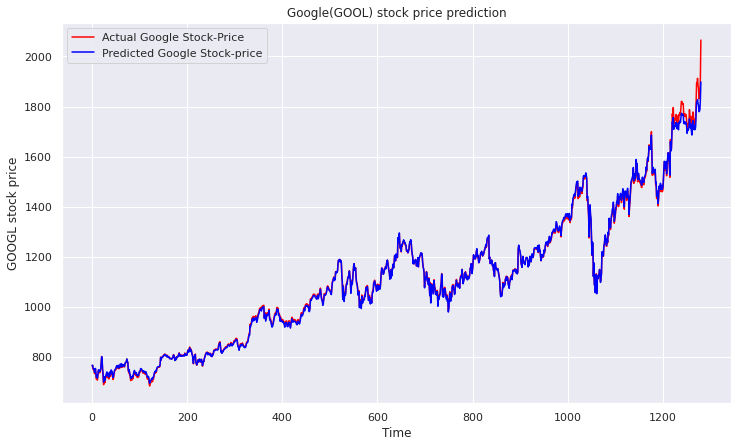

In [28]:
regressor.fit(X_tain,y_tain,epochs=1000, batch_size=32)

trained_set_pred = regressor.predict(X_tain)
trained_set_pred = sc.inverse_transform(trained_set_pred)

test_set_pred = regressor.predict(X_test)
test_set_pred = sc.inverse_transform(test_set_pred)


real_result = sc.inverse_transform(series)
predictions = np.concatenate((trained_set_pred, test_set_pred),axis=0)



plt.figure(figsize=(12,7))
plt.plot(real_result,color='red',label='Actual Google Stock-Price')
plt.plot(predictions,color='blue',label='Predicted Google Stock-price')
plt.title('Google(GOOL) stock price prediction')
plt.xlabel('Time')
plt.ylabel('GOOGL stock price')
plt.legend()
plt.show()

In [29]:
import math
from sklearn.metrics import mean_squared_error

In [32]:
rmse = math.sqrt(mean_squared_error(series[1259:],regressor.predict(X_test)))

In [33]:
rmse

0.04424049168246994